In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/101TVGPr73GurJZc2yQ4-4uhI5Cr8vnlJKV1fG1GjEmg/pub?gid=2002757951&single=true&output=csv',
                   na_values='?'  , encoding='utf-8' )
data = data.drop('time', axis=1)
data.head(5)

,vozrast,pol,rodilis,shkola,predmety,kto_vibral,tip_obr,obr,gde_uchilsya,po_special,...,staj,zarplata,hobby,mama_obr,mama_prof,papa_obr,papa_prof,rodstv_usp,rodstv_rab,menyli_napr
0,31,жен,город,11кл,математика,Родители,Техническое,Высшее,В другом городе,никогда не работал по специальности,...,до 5 лет,"нет зарплаты, не работаю",рукоделие,начальное профессиональное,экономические,начальное профессиональное (тех. училище),Технические,да,"есть, не работают",нет
1,45,жен,город,11кл,"Биология, география",Выбирал сам,Гуманитарное,2 и более высших,В другом городе,работал и работаю по специальности,...,20 и выше,10 000-20 000,"разные спокойные хобби ( собирание пазлов, нап...",среднее профессиональное,Технические,высшее,Технические,да,"есть, работают",нет
2,24,жен,город,9кл,"Русский, литература",Родственники,Гуманитарное,среднее и высшее,У себя в городе,работал и работаю по специальности,...,5-10 лет,10 000-20 000,"разные активные хобби(верховая езда, граффити,...",высшее,педагогические,неполное среднее,не работаю,нет,нет,нет
3,35,жен,город,11кл,математика,Выбирал сам,Техническое,Высшее,У себя в городе,работал и работаю по специальности,...,10-15 лет,от 50 000,танцы,среднее профессиональное,Технические,"среднее профессиональное ( техникум, коллежд)",Технические,да,нет,нет
4,35,жен,город,11кл,"Биология, география",Выбирал сам,Гуманитарное,Высшее,В другом городе,работал и работаю по специальности,...,10-15 лет,10 000-20 000,рукоделие,среднее,Технические,среднее,Технические,нет,"есть, работают",нет


In [3]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print categorical_columns
print numerical_columns

[u'pol', u'rodilis', u'shkola', u'predmety', u'kto_vibral', u'tip_obr', u'obr', u'gde_uchilsya', u'po_special', u'professiya', u'happy', u'staj', u'zarplata', u'hobby', u'mama_obr', u'mama_prof', u'papa_obr', u'papa_prof', u'rodstv_usp', u'rodstv_rab', u'menyli_napr']
[u'vozrast']


In [4]:
data[categorical_columns].describe()

,pol,rodilis,shkola,predmety,kto_vibral,tip_obr,obr,gde_uchilsya,po_special,professiya,...,staj,zarplata,hobby,mama_obr,mama_prof,papa_obr,papa_prof,rodstv_usp,rodstv_rab,menyli_napr
count,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
unique,2,2,2,8,4,2,5,2,3,16,...,6,5,8,6,14,6,11,2,3,3
top,жен,город,11кл,математика,Выбирал сам,Техническое,Высшее,У себя в городе,работал и работаю по специальности,педагогические,...,10-15 лет,10 000-20 000,"разные спокойные хобби ( собирание пазлов, нап...",среднее профессиональное,педагогические,"среднее профессиональное ( техникум, коллежд)",Технические,да,"есть, работают",нет
freq,70,75,67,41,49,54,59,50,42,12,...,28,35,32,41,19,37,38,73,71,49


In [5]:
# data[categorical_columns].hist()

In [6]:
#конвертируем текстовые значения в числовые индексы

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
data_fit = data

# Encoding the variable
data_fit = data.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
# data_fit.apply(lambda x: d[x.name].transform(x))

# print d['pol'].transform('муж')
# print d['professiya'].inverse_transform(8)

data_fit[:4]


,vozrast,pol,rodilis,shkola,predmety,kto_vibral,tip_obr,obr,gde_uchilsya,po_special,...,staj,zarplata,hobby,mama_obr,mama_prof,papa_obr,papa_prof,rodstv_usp,rodstv_rab,menyli_napr
0,9,0,0,0,3,2,1,1,0,0,...,4,3,3,2,12,2,1,0,0,1
1,22,0,0,0,0,0,0,0,0,1,...,2,0,2,5,1,0,1,0,1,1
2,2,0,0,1,1,3,0,4,1,1,...,3,0,1,0,7,3,4,1,2,1
3,13,0,0,0,3,0,1,1,1,1,...,0,4,5,5,1,5,1,0,2,1


In [7]:
# binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
# nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
# print binary_columns, nonbinary_columns

In [8]:
# res = pd.get_dummies(data_x)
# res[:5]

# Тренеруем алгоритм

In [9]:
def predskazanie(data,chto=''):
    """
    Основная функция предсказаний, 
    Передаем столбцы и предсказываем значение
    """
    
    X = data.drop((chto), axis=1)  # Выбрасываем столбец 
    print data.shape

    y = data[chto]
    feature_names = X.columns
    print feature_names

    # подготавливаем выборку
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

    N_train, _ = X_train.shape 
    N_test,  _ = X_test.shape 
    print N_train, N_test

    # запускаем лес
    from sklearn import ensemble
    rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
    rf.fit(X_train, y_train)

    err_train = np.mean(y_train != rf.predict(X_train))
    err_test  = np.mean(y_test  != rf.predict(X_test))
    print 'Процент ошибки: ', err_train, err_test

    #выбираем важные
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("Важность признаков по убыванию:")
    for f, idx in enumerate(indices):
        print("{:2d}. признак '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

    #график важных
    d_first = data.shape[1]-1
    plt.figure(figsize=(8, 8))
    plt.title("Важность признаков для предсказании: " + chto)
    plt.barh(range(d_first), importances[indices[:d_first]], align='center')
    plt.yticks(range(d_first), np.array(feature_names)[indices[:d_first]])
#     plt.xlim([-1, d_first]);
    
    return X


## Профессия

(96, 20)
Index([u'pol', u'rodilis', u'shkola', u'predmety', u'kto_vibral', u'tip_obr',
       u'obr', u'gde_uchilsya', u'po_special', u'staj', u'zarplata', u'hobby',
       u'mama_obr', u'mama_prof', u'papa_obr', u'papa_prof', u'rodstv_usp',
       u'rodstv_rab', u'menyli_napr'],
      dtype='object')
67 29
Процент ошибки:  0.0 0.896551724138
Важность признаков по убыванию:
 1. признак 'zarplata' (0.1108)
 2. признак 'papa_prof' (0.0860)
 3. признак 'mama_prof' (0.0803)
 4. признак 'staj ' (0.0798)
 5. признак 'hobby' (0.0740)
 6. признак 'predmety' (0.0715)
 7. признак 'po_special' (0.0711)
 8. признак 'papa_obr' (0.0573)
 9. признак 'mama_obr' (0.0524)
10. признак 'kto_vibral' (0.0475)
11. признак 'tip_obr' (0.0394)
12. признак 'rodstv_rab' (0.0388)
13. признак 'menyli_napr' (0.0351)
14. признак 'gde_uchilsya' (0.0319)
15. признак 'obr  ' (0.0309)
16. признак 'rodstv_usp' (0.0291)
17. признак 'pol  ' (0.0281)
18. признак 'shkola' (0.0214)
19. признак 'rodilis' (0.0145)


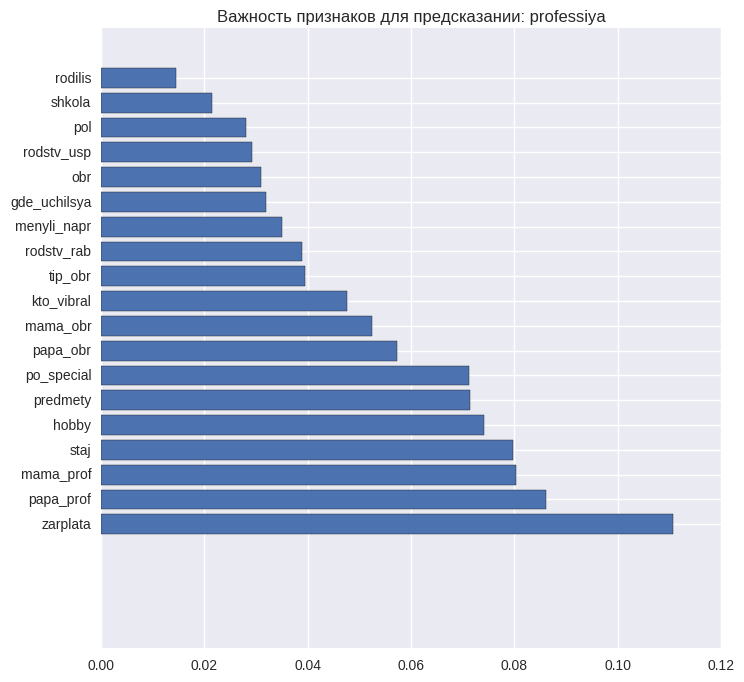

In [10]:
professiya = predskazanie(data_fit.drop(['happy', 'vozrast'], axis=1),chto='professiya')

# Зарплату

(96, 20)
Index([u'pol', u'rodilis', u'shkola', u'predmety', u'kto_vibral', u'tip_obr',
       u'obr', u'gde_uchilsya', u'po_special', u'professiya', u'staj',
       u'hobby', u'mama_obr', u'mama_prof', u'papa_obr', u'papa_prof',
       u'rodstv_usp', u'rodstv_rab', u'menyli_napr'],
      dtype='object')
67 29
Процент ошибки:  0.0 0.689655172414
Важность признаков по убыванию:
 1. признак 'professiya' (0.1269)
 2. признак 'staj ' (0.0828)
 3. признак 'predmety' (0.0768)
 4. признак 'hobby' (0.0747)
 5. признак 'mama_prof' (0.0710)
 6. признак 'papa_prof' (0.0700)
 7. признак 'papa_obr' (0.0515)
 8. признак 'po_special' (0.0513)
 9. признак 'tip_obr' (0.0511)
10. признак 'kto_vibral' (0.0482)
11. признак 'mama_obr' (0.0470)
12. признак 'menyli_napr' (0.0443)
13. признак 'rodstv_rab' (0.0414)
14. признак 'obr  ' (0.0340)
15. признак 'rodstv_usp' (0.0298)
16. признак 'shkola' (0.0258)
17. признак 'pol  ' (0.0253)
18. признак 'rodilis' (0.0241)
19. признак 'gde_uchilsya' (0.0239)


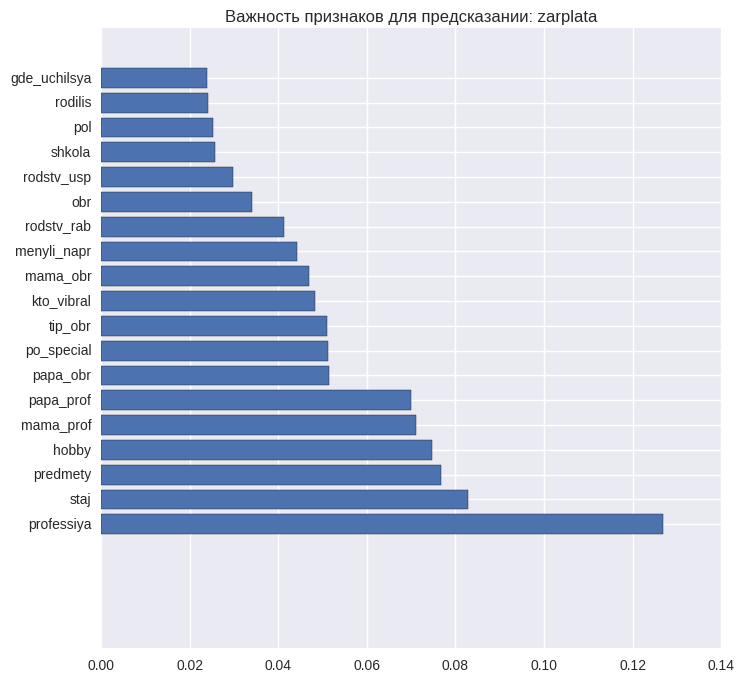

In [11]:
zarplata = predskazanie(data_fit.drop(['happy', 'vozrast'], axis=1),chto='zarplata')

# Пол

(96, 22)
Index([u'vozrast', u'rodilis', u'shkola', u'predmety', u'kto_vibral',
       u'tip_obr', u'obr', u'gde_uchilsya', u'po_special', u'professiya',
       u'happy', u'staj', u'zarplata', u'hobby', u'mama_obr', u'mama_prof',
       u'papa_obr', u'papa_prof', u'rodstv_usp', u'rodstv_rab',
       u'menyli_napr'],
      dtype='object')
67 29
Процент ошибки:  0.0 0.344827586207
Важность признаков по убыванию:
 1. признак 'vozrast' (0.1257)
 2. признак 'professiya' (0.1070)
 3. признак 'papa_prof' (0.0811)
 4. признак 'predmety' (0.0790)
 5. признак 'hobby' (0.0773)
 6. признак 'menyli_napr' (0.0602)
 7. признак 'zarplata' (0.0584)
 8. признак 'staj ' (0.0549)
 9. признак 'mama_prof' (0.0519)
10. признак 'po_special' (0.0432)
11. признак 'obr  ' (0.0413)
12. признак 'mama_obr' (0.0383)
13. признак 'rodstv_rab' (0.0291)
14. признак 'papa_obr' (0.0283)
15. признак 'kto_vibral' (0.0280)
16. признак 'happy' (0.0244)
17. признак 'tip_obr' (0.0206)
18. признак 'gde_uchilsya' (0.0171)
19. приз

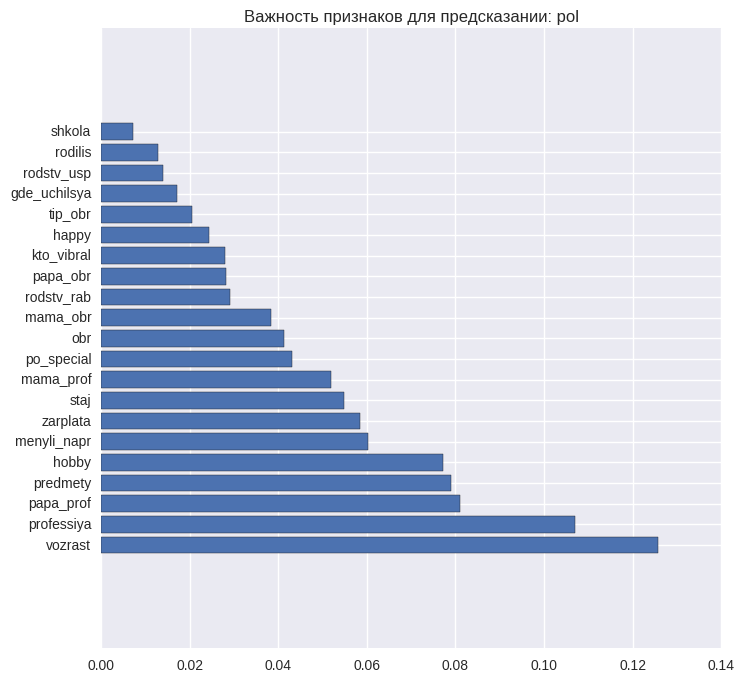

In [14]:
pol = predskazanie(data_fit,chto='pol')

# ОБЩИЙ АНАЛИЗ ДАННЫХ

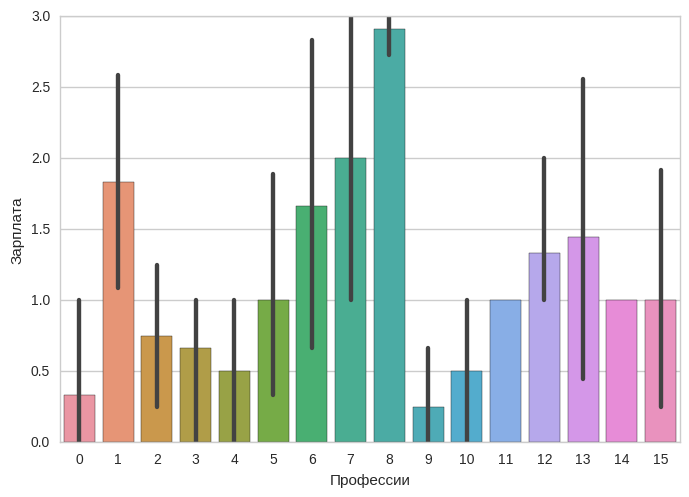

0 Строительство
1 Технические
2 бизнес
3 военные
4 издательство и типография
5 информатика и связь
6 медицинские
7 научные
8 не работаю
9 педагогические
10 пищевые
11 сельское хозяйство
12 сервис и обслуживание
13 творческие
14 транспортные
15 экономические


In [53]:
## Профессия и Зарплата

xxx = 'professiya'
yyy = 'zarplata'

ax = sns.barplot(x=xxx, y=yyy, data=data_fit);
ax.set(xlabel='Профессии', ylabel='Зарплата')
plt.show()

maxval = data_fit.loc[data_fit[xxx].idxmax()][xxx]

for i in range(maxval+1):
    print i, d[xxx].inverse_transform(i)

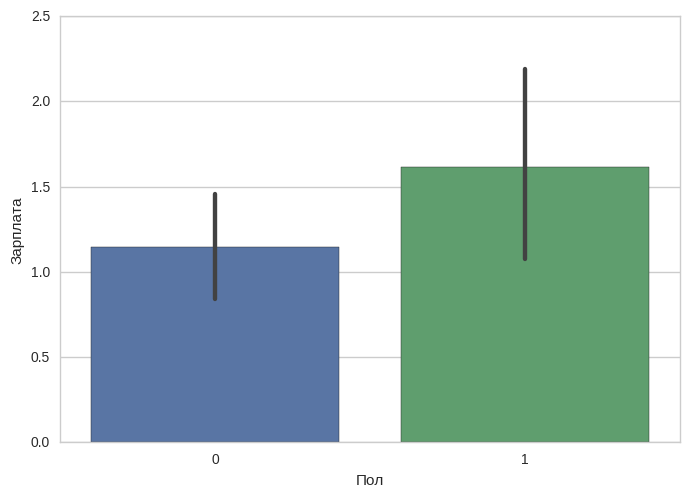

0 жен
1 муж


In [55]:
# sns.swarmplot(x="pol", y="zarplata", data=data_fit);

## Пол и Зарплата

xxx = 'pol'
yyy = 'zarplata'

ax = sns.barplot(x=xxx, y=yyy, data=data_fit);
ax.set(xlabel='Пол', ylabel='Зарплата')
plt.show()

maxval = data_fit.loc[data_fit[xxx].idxmax()][xxx]

for i in range(maxval+1):
    print i, d[xxx].inverse_transform(i)

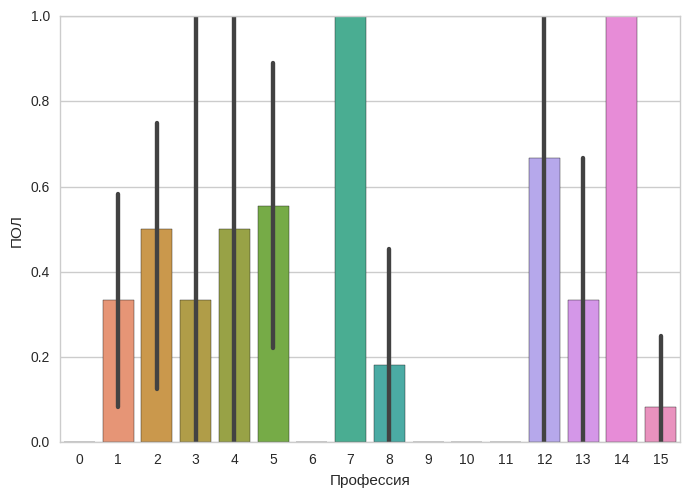

0 Строительство
1 Технические
2 бизнес
3 военные
4 издательство и типография
5 информатика и связь
6 медицинские
7 научные
8 не работаю
9 педагогические
10 пищевые
11 сельское хозяйство
12 сервис и обслуживание
13 творческие
14 транспортные
15 экономические


In [59]:

## Пол и Зарплата

xxx = 'professiya'
yyy = 'pol'

ax = sns.barplot(x=xxx, y=yyy, data=data_fit);
ax.set(xlabel='Профессия', ylabel='ПОЛ')
plt.show()

maxval = data_fit.loc[data_fit[xxx].idxmax()][xxx]

for i in range(maxval+1):
    print i, d[xxx].inverse_transform(i)